In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv("data/stocks/AAMC.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df.head()

,Close
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


In [37]:
df['Close_1'] = df['Close'].shift(1)
df['Close_2'] = df['Close'].shift(2)
df['Close_3'] = df['Close'].shift(3)
df.dropna(inplace=True)
df.head()

,Close,Close_1,Close_2,Close_3
Date,,,,
1980-12-17,0.462054,0.450893,0.486607,0.513393
1980-12-18,0.475446,0.462054,0.450893,0.486607
1980-12-19,0.504464,0.475446,0.462054,0.450893
1980-12-22,0.529018,0.504464,0.475446,0.462054
1980-12-23,0.551339,0.529018,0.504464,0.475446


In [38]:
X = df[['Close_1', 'Close_2', 'Close_3']].values
y = df['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [39]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"[Linear Regression] MSE: {lr_mse:.4f}")
print(f"[Linear Regression] R² Score: {lr_r2:.4f}")

[Linear Regression] MSE: 8.6056
[Linear Regression] R² Score: 0.9974


In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"[Random Forest] MSE: {rf_mse:.4f}")
print(f"[Random Forest] R² Score: {rf_r2:.4f}")

[Random Forest] MSE: 5253.1106
[Random Forest] R² Score: -0.5758


In [41]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)

In [42]:
nn_model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
nn_model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

nn_pred = nn_model.predict(X_test_nn).flatten()

nn_mse = mean_squared_error(y_test_nn, nn_pred)
nn_r2 = r2_score(y_test_nn, nn_pred)

print(f"[Neural Network] MSE: {nn_mse:.4f}")
print(f"[Neural Network] R² Score: {nn_r2:.4f}")

C:\Users\widya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[Neural Network] MSE: 1171.3722
[Neural Network] R² Score: 0.6486


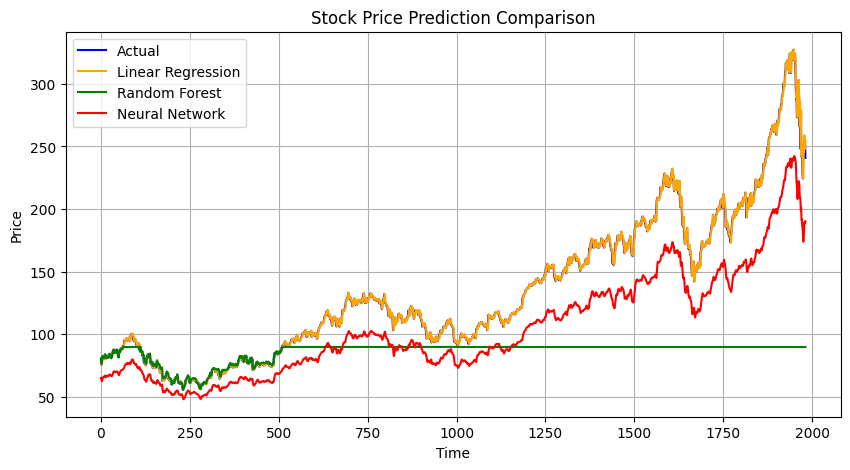

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(lr_pred, label='Linear Regression', color='orange')
plt.plot(rf_pred, label='Random Forest', color='green')
plt.plot(nn_pred, label='Neural Network', color='red')
plt.title("Stock Price Prediction Comparison")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()